In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from math import sqrt
import warnings

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

#**1. Import Data**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
* Analyze factors affecting the number of car rentals
- To propose ideas to increase the number of car rental customers


In [80]:
file_path = '/content/drive/MyDrive/Data Analysis Course/Seoul Bike/SeoulBikeData.csv'
df = pd.read_csv(file_path, encoding='latin-1') # Try reading with 'latin-1' encoding

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#**2. Basic Data Structure**


##**Variables**
* Dependent variable: Rented Bike Count
* Independent variable: The remaining variables

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [82]:
df.describe().round(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000
mean,704.602,11.500,12.883,58.226,1.725,1436.826,4.074,0.569,0.149,0.075
std,644.997,6.923,11.945,20.362,1.036,608.299,13.060,0.869,1.128,0.437
min,0.000,0.000,-17.800,0.000,0.000,27.000,-30.600,0.000,0.000,0.000
25%,191.000,5.750,3.500,42.000,0.900,940.000,-4.700,0.000,0.000,0.000
50%,504.500,11.500,13.700,57.000,1.500,1698.000,5.100,0.010,0.000,0.000
75%,1065.250,17.250,22.500,74.000,2.300,2000.000,14.800,0.930,0.000,0.000
max,3556.000,23.000,39.400,98.000,7.400,2000.000,27.200,3.520,35.000,8.800


##**Clean Data**

In [83]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [84]:
df.shape

(8760, 14)

In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [87]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [88]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Hour'] = df['Hour'].astype(int)
df['Seasons'] = df['Seasons'].astype('category')
df['Holiday'] = df['Holiday'].astype('category')
df['Functioning Day'] = df['Functioning Day'].astype('category')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


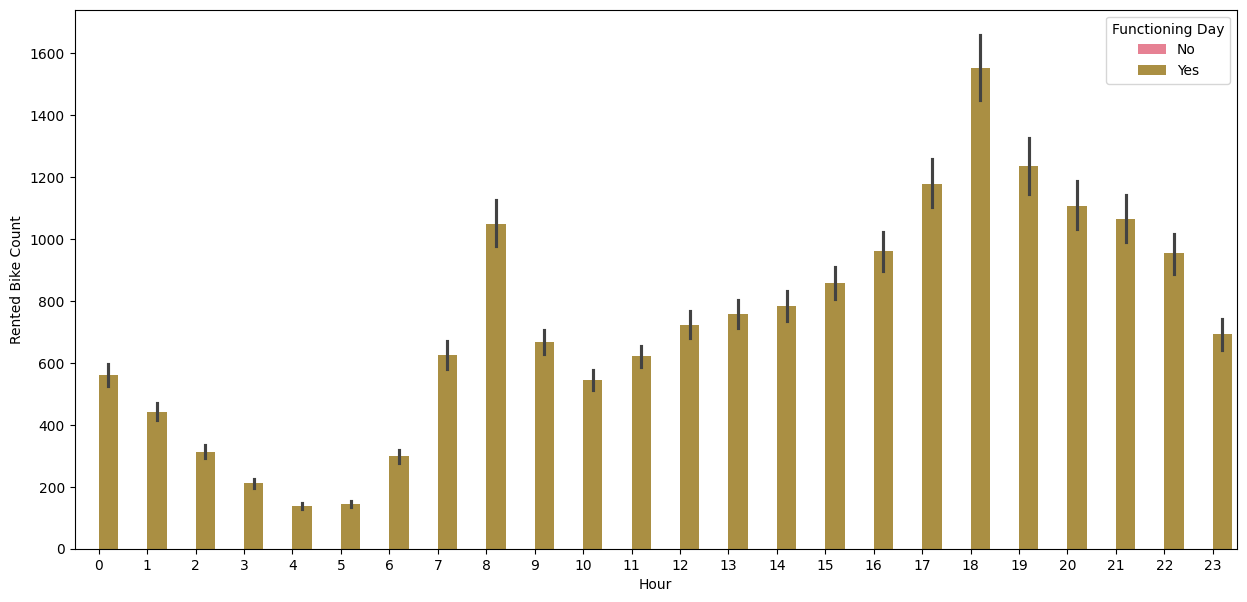

In [89]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=df);
barplots('Hour','Rented Bike Count','Functioning Day')

In [90]:
df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()


,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


According to the diagnosis data, rental bikes are only provided on functioning days. Therefore, remove the non-functioning days and then eliminate the Functioning Day column as well.

In [91]:
df1 = df[df['Functioning Day'] == 'Yes']
df1 = df1.drop('Functioning Day', axis=1)
df1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


##**Spliting Date column**

In [92]:
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year
df1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018


In [93]:
df1.drop(columns='Date',inplace=True)
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018


##**Checking Correlation Of Data**

In [94]:
df1.corr(numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611,0.007644,0.167186,0.232004
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082,-0.001140,0.001048,0.000315
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746,0.014461,0.213947,0.377003
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127,-0.024615,0.139090,0.035188
Wind speed (m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789,-0.033204,-0.154149,-0.003568
Visibility (10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860,-0.115933,0.063474,0.051802
Dew point temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760,0.000784,0.239406,0.334985
Solar Radiation (MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380,-0.001724,-0.028675,0.130141
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604,0.000455,0.010912,0.028228
Snowfall (cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000,0.101834,0.058410,-0.205030


<Axes: >

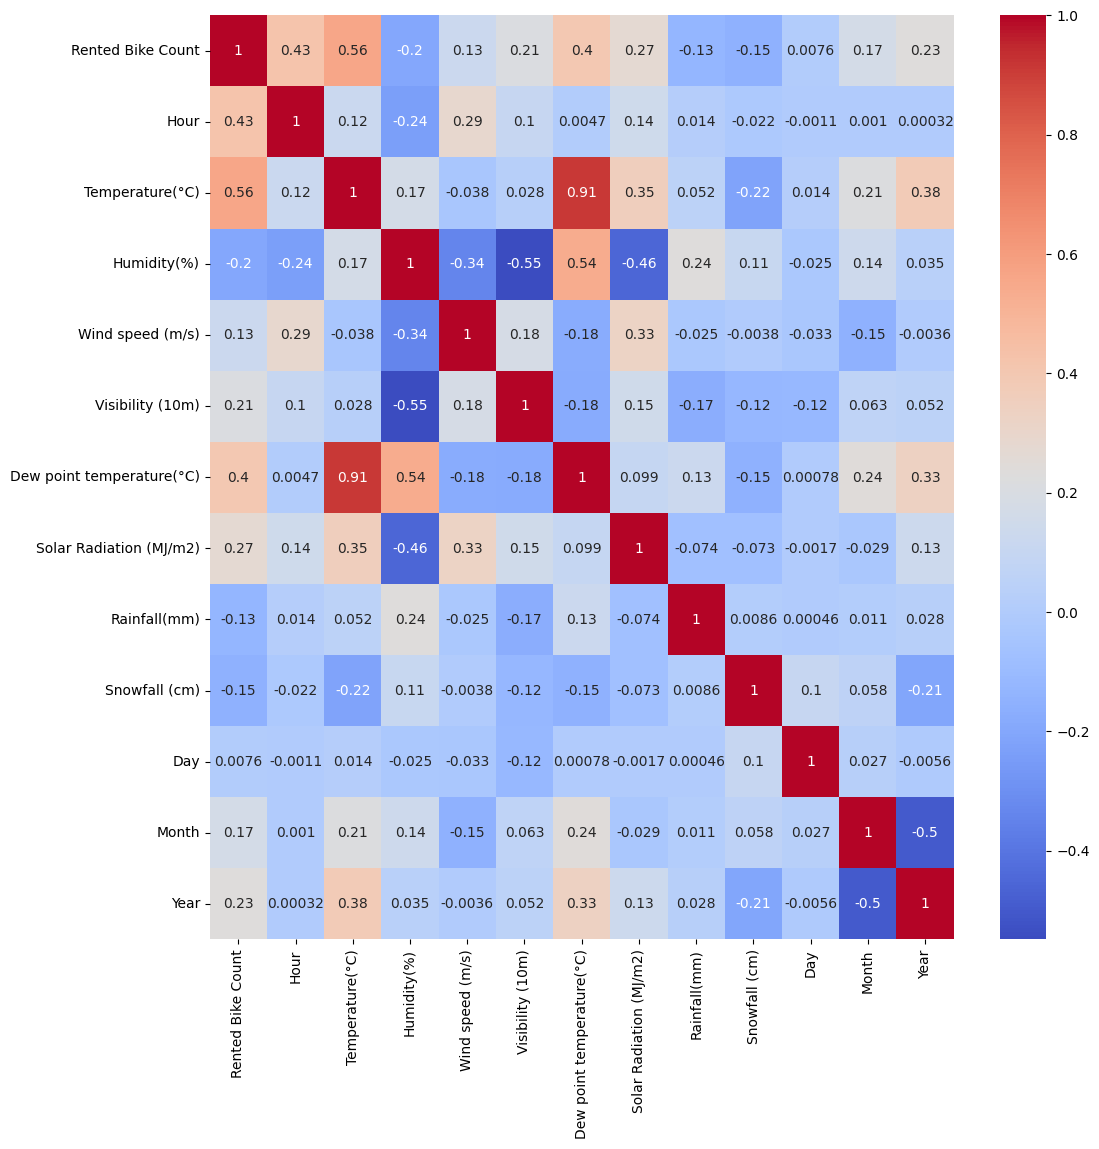

In [95]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap='coolwarm')

Temperature and dew point temperature have a correlation of almost 0.91, indicating a strong positive linear relationship between them. This high correlation suggests that the two variables contain similar information. As a result, including both in a model can lead to multicollinearity issues, where the model has difficulty distinguishing the individual effect of each variable. To address this, we drop the dew point temperature feature to reduce redundancy and improve the model's performance.

In [96]:
df1.drop(columns='Dew point temperature(°C)',inplace=True)
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018


##**Numerical column**


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8465 non-null   int64   
 1   Hour                     8465 non-null   int64   
 2   Temperature(°C)          8465 non-null   float64 
 3   Humidity(%)              8465 non-null   int64   
 4   Wind speed (m/s)         8465 non-null   float64 
 5   Visibility (10m)         8465 non-null   int64   
 6   Solar Radiation (MJ/m2)  8465 non-null   float64 
 7   Rainfall(mm)             8465 non-null   float64 
 8   Snowfall (cm)            8465 non-null   float64 
 9   Seasons                  8465 non-null   category
 10  Holiday                  8465 non-null   category
 11  Day                      8465 non-null   int32   
 12  Month                    8465 non-null   int32   
 13  Year                     8465 non-null   int32   
dtypes: category(2

In [98]:
numeric_col=df1.select_dtypes(include=np.number).columns.tolist()
numeric_col

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [99]:
data_numeric=df1[numeric_col].copy()
data_numeric

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


Filtering the rows of a DataFrame based on the z-scores of the numeric columns and keeping only rows with numeric values within 2.5 standard deviations of each column's mean is a common technique for outlier removal.
* Here’s why it is done:
Z-scores measure how many standard deviations a data point is from the mean. A z-score within ±2.5 typically indicates that the data point is within the normal range, while a z-score beyond this range may indicate an outlier.

In [100]:
df1 = df1[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
df1.shape

(6875, 14)

In [101]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
744,206,0,-3.2,40,0.5,1358,0.0,0.0,0.0,Winter,Holiday,1,1,2018
745,230,1,-3.3,41,0.7,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
746,178,2,-3.7,42,0.9,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
747,119,3,-4.0,44,1.0,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
748,62,4,-4.2,53,1.1,1994,0.0,0.0,0.0,Winter,Holiday,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018


##**Categorical variables**

#**3. Exploratory Data Analysis**
We use data from DataFrame 2 (divided data by Date) to evaluate the p-value, correlation level and correlation chart of the independent variable and dependent variable.

###3.1. P-value and Pearson correlation analysis

Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year

In [102]:
#Hour Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Hour'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.45188565447361473 , P-value = 0.0


In [103]:
#Temperature(°C) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Temperature(°C)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.5357462237195622 , P-value = 0.0


In [104]:
# Humidity(%) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Humidity(%)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient -0.17660908824377752 , P-value = 2.768245767354705e-49


In [105]:
# Wind speed (m/s) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Wind speed (m/s)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.1312528385546356 , P-value = 8.447375413972113e-28


In [106]:
#Visibility (10m) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Visibility (10m)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.18196225099417374 , P-value = 2.9473923283629167e-52


In [107]:
#Solar Radiation (MJ/m2) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Solar Radiation (MJ/m2)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.2571056638942887 , P-value = 3.193611594644892e-104


In [108]:
#Rainfall(mm) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Solar Radiation (MJ/m2)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.2571056638942887 , P-value = 3.193611594644892e-104


In [109]:
#Snowfall (cm) Vs Rented Bike Count
pearson_coef, p_value = stats.pearsonr(df1['Solar Radiation (MJ/m2)'], df1['Rented Bike Count'])
print("Person coefficient", pearson_coef, ", P-value =", p_value)

Person coefficient 0.2571056638942887 , P-value = 3.193611594644892e-104


Based on the P-Value value and the Pearson Coefficient, P-value arrange the independent variables in ascending order compatible with "Rented Bike Count":
* Temparature
* Hour
* Solar Radiation (MJ/m2)
* Rainfall (mm)
* Snowfall (cm)
* Visibility
* Humidity
* WindSpeed

This analysis uses 5 variables
* Time
* Temperature
* Hour
* Solar Radiation
* Rainfall
to analyze the influence on the number of rented cars

## 3.2 Rented Bike Count by Time

###**Total Rented Bike by Month**

In [110]:
df_monthlyrent=df1.groupby('Month')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()
df_monthlyrent

,Month,Rented Bike Count
0,7,624558
1,6,601772
2,10,599719
3,8,597485
4,9,555553
5,5,547749
6,11,453274
7,4,412213
8,3,365157
9,2,142138


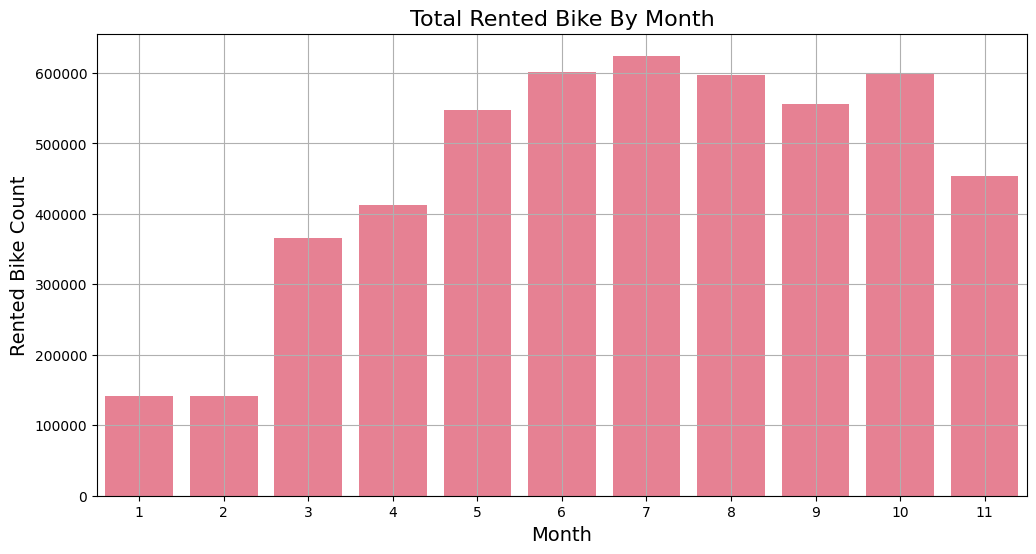

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y='Rented Bike Count',data=df_monthlyrent)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Rented Bike Count',fontsize=14)
plt.title('Total Rented Bike By Month',fontsize=16)
plt.grid()

* **Peak Month**: July shows the highest number of rentals, indicating this is the most popular month for bike rentals.
* **Low Months**: January and February have the lowest rental counts, which might be due to winter weather conditions.


###**Average Rented Bike Daily**

In [112]:
df_dailyrent= df1.groupby('Day')['Rented Bike Count'].mean().reset_index()
df_dailyrent

,Day,Rented Bike Count
0,1,774.784038
1,2,637.912844
2,3,724.562791
3,4,696.427885
4,5,634.629787
5,6,736.278846
6,7,779.983193
7,8,700.713693
8,9,638.968750
9,10,763.877451


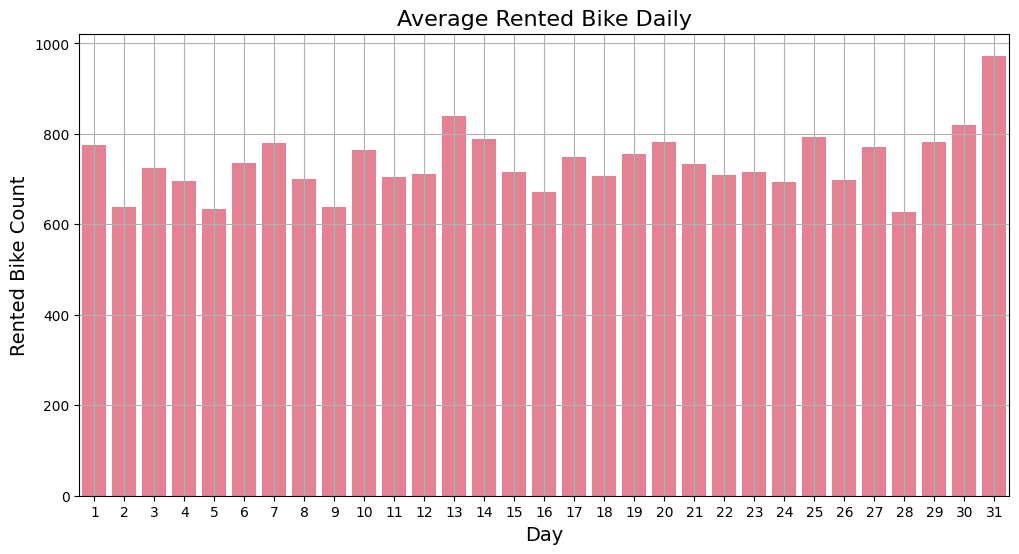

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='Rented Bike Count',data=df_dailyrent)
plt.xlabel('Day',fontsize=14)
plt.ylabel('Rented Bike Count',fontsize=14)
plt.title('Average Rented Bike Daily',fontsize=16)
plt.grid()

Bike rentals are fairly stable throughout the month, with occasional peaks and a significant rise on the last day of the month



###**Total Rented Bike Count By Seasons**

In [114]:
df1.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,1823815
1,Autumn,1608546
2,Spring,1325119
3,Winter,283106


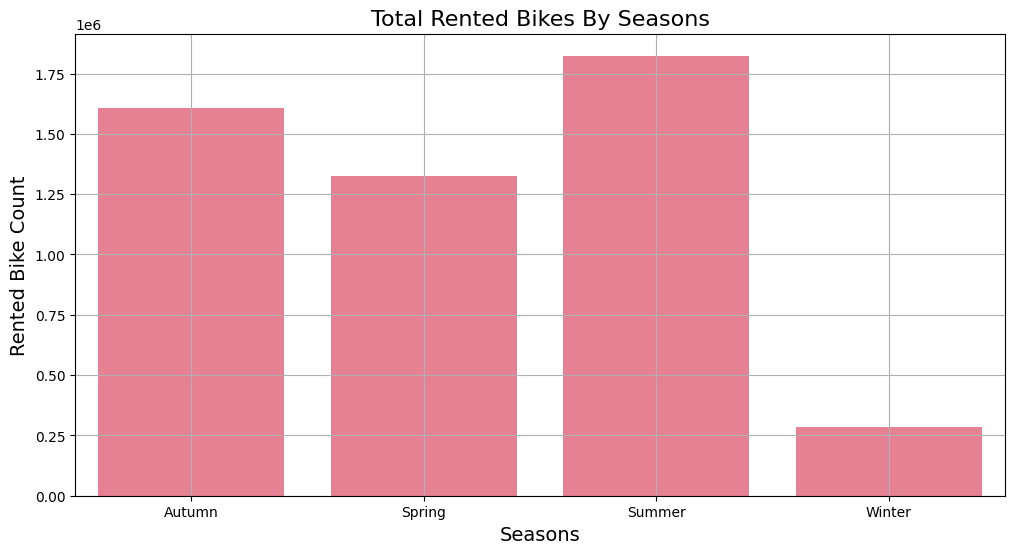

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df1.groupby('Seasons')['Rented Bike Count'].sum().reset_index())
plt.xlabel('Seasons',fontsize=14)
plt.ylabel('Rented Bike Count',fontsize=14)
plt.title('Total Rented Bikes By Seasons',fontsize=16)
plt.grid()

* **Highest Rental Season:** Summer has the highest bike rental count, with around 1.8 million rentals. This indicates that summer is the peak season for bike rentals, likely due to favorable weather conditions and longer daylight hours.
* **Moderate Rental Seasons:** Autumn and Spring both have high bike rental counts, with Autumn slightly higher than Spring. This suggests that these seasons also have good conditions for biking, though not as optimal as summer.
* **Lowest Rental Season:** Winter has the lowest bike rental count by a significant margin. The total rentals in winter are much lower compared to the other seasons, which can be attributed to colder weather, shorter days, and potentially harsher conditions for biking.
* **Seasonal Trends:** There is a clear seasonal trend where bike rentals increase during the warmer months (Spring, Summer, and Autumn) and decrease sharply during the colder months (Winter).

###**Total Rented Bike Count By Holiday**

In [116]:
df_holiday=df1.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()
df_holiday

,Holiday,Rented Bike Count
0,No Holiday,4862243
1,Holiday,178343


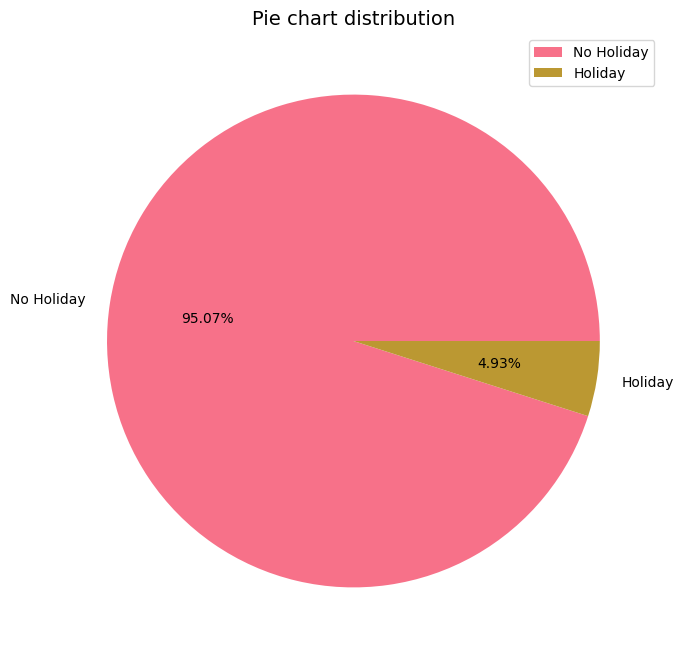

In [117]:
plt.figure(figsize=(8,8))
plt.pie(df['Holiday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

In [118]:
holiday_data = df1[df1['Holiday'] == 'Holiday']
holiday_daily_rent = holiday_data.groupby(['Day','Month'])['Rented Bike Count'].sum().reset_index()
holiday_daily_rent


,Day,Month,Rented Bike Count
0,1,1,4290
1,1,3,1840
2,1,5,26820
3,3,10,27949
4,6,6,23225
5,15,2,3484
6,15,8,18565
7,16,2,2593
8,17,2,2845
9,22,5,12677


The number of car rentals on No Holiday days is larger because there are only 12 Holiday days in the dataframe. Analyze car rental rates during holidays to see car rental trends during holidays

In [119]:
holiday_daily_rent['Month_Day'] = holiday_daily_rent['Month'].astype(str) + '-' + holiday_daily_rent['Day'].astype(str)
holiday_daily_rent

,Day,Month,Rented Bike Count,Month_Day
0,1,1,4290,1-1
1,1,3,1840,3-1
2,1,5,26820,5-1
3,3,10,27949,10-3
4,6,6,23225,6-6
5,15,2,3484,2-15
6,15,8,18565,8-15
7,16,2,2593,2-16
8,17,2,2845,2-17
9,22,5,12677,5-22


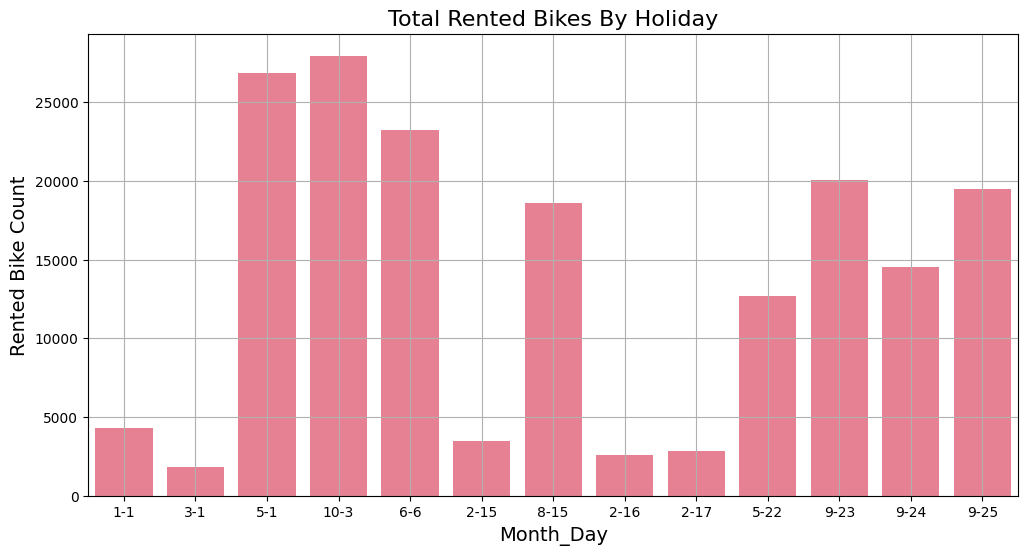

In [120]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month_Day',y='Rented Bike Count',data=holiday_daily_rent)
plt.xlabel('Month_Day',fontsize=14)
plt.ylabel('Rented Bike Count',fontsize=14)
plt.title('Total Rented Bikes By Holiday',fontsize=16)
plt.grid()

* **High Rental Days:**
 * *May 1st (5-1) and June 6th (6-6)*: These dates show a significant spike in bike rentals, indicating that these holidays are very popular for biking activities. This could be due to favorable weather conditions or the nature of the holiday itself, encouraging outdoor activities.
 * *October 3rd (10-3)*: This day also shows a high number of bike rentals, suggesting it is another peak day for bike usage.
* **Low Rental Days:**
 * *January 1st (1-1):* This date shows lower bike rentals, possibly due to colder weather or the nature of New Year's Day where fewer people engage in outdoor activities.
 * *March 1st (3-1), February 16th (2-16), and February 17th (2-17)*: These dates also show low bike rentals, likely due to weather conditions or the type of holiday

## 3.3 Rented Bike Counts VS Temperature

In [121]:
df1[['Temperature(°C)','Rented Bike Count']]

,Temperature(°C),Rented Bike Count
744,-3.2,206
745,-3.3,230
746,-3.7,178
747,-4.0,119
748,-4.2,62
...,...,...
8755,4.2,1003
8756,3.4,764
8757,2.6,694
8758,2.1,712


<Axes: xlabel='Temperature(°C)'>

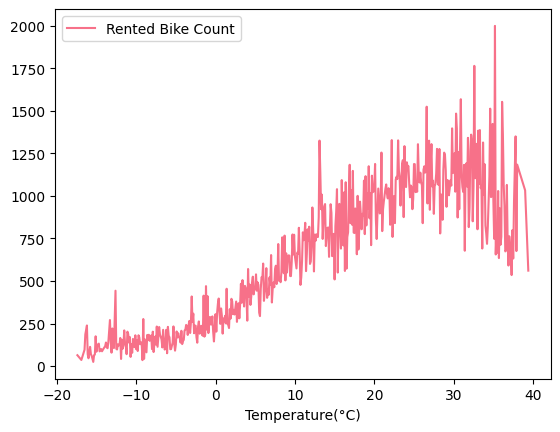

In [122]:
df_temp=df1.groupby(['Temperature(°C)'])['Rented Bike Count'].mean().reset_index()
temp_count = pd.pivot_table(df_temp, values = "Rented Bike Count", index= "Temperature(°C)")
temp_count.plot()

* **Positive Correlation:**
 * There is a clear positive correlation between temperature and the number of rented bikes. As the temperature increases from -20°C to around 30°C, the number of bike rentals also increases. This indicates that warmer weather generally encourages more people to rent bikes.

* **Optimal Temperature Range:**

 * The number of bike rentals peaks around the temperature range of 20°C to 30°C. This range appears to be the most favorable for bike rentals, likely because it is warm but not excessively hot, making it comfortable for outdoor activities.
* **Decline at Extreme Temperatures:**

 * There is a noticeable decline in bike rentals when temperatures exceed 30°C. Extremely high temperatures may deter people from renting bikes due to the discomfort of riding in very hot weather.

 * Similarly, when temperatures are below 0°C, bike rentals are very low. Cold weather, possibly accompanied by snow or ice, makes biking less appealing and more challenging.

## 3.4 Rented Bike Counts VS Hour

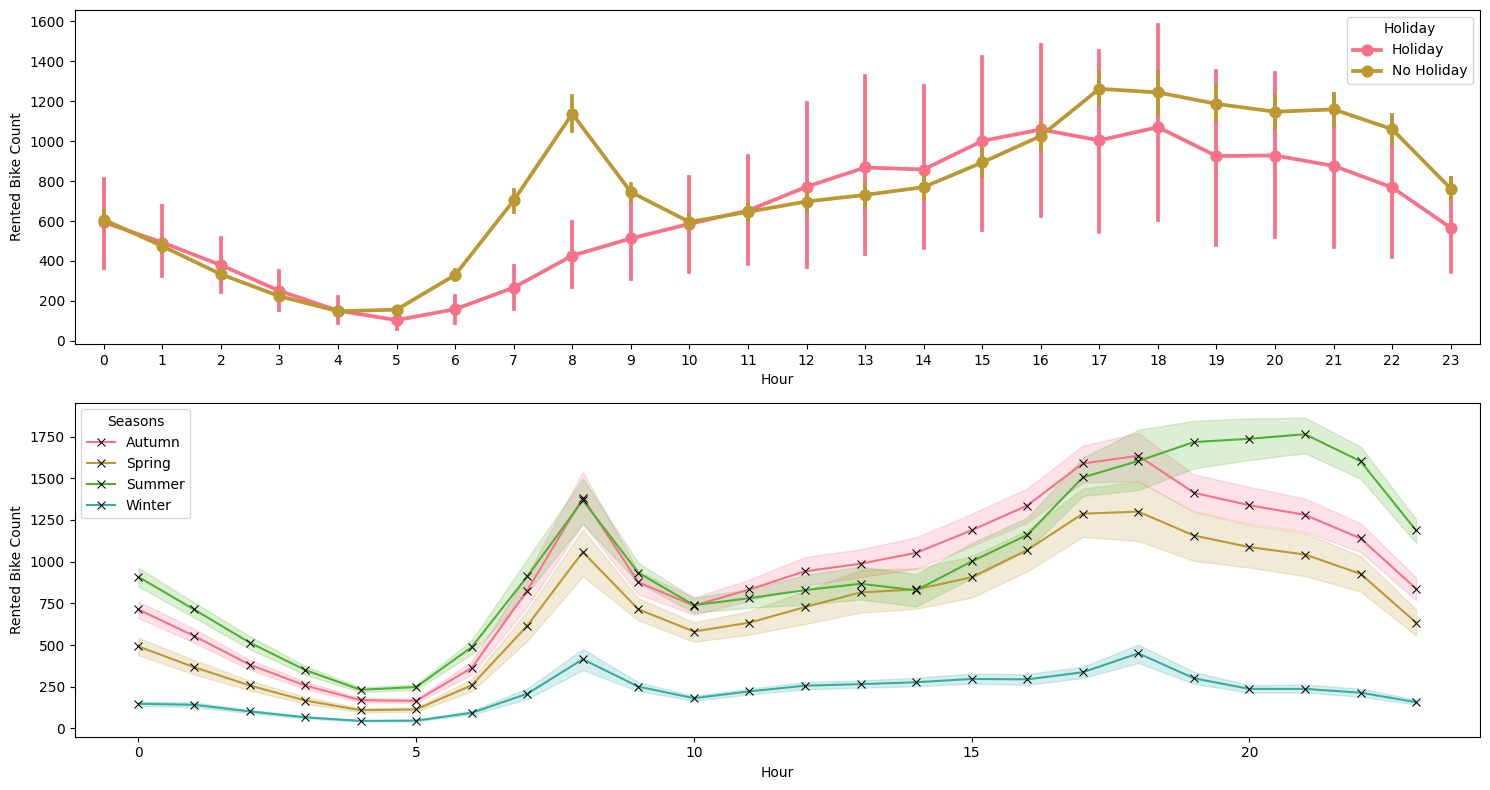

In [123]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=df1, x="Hour", y="Rented Bike Count", ax=axs[0],
              hue="Holiday")
sns.lineplot(data=df1, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

#### First Plot (Holidays vs. No Holidays):

1. **Morning Peak:**
   - On non-holidays, there is a clear peak in bike rentals around 8 AM, likely corresponding to the morning commute to work or school.
   - On holidays, the morning peak is less pronounced, suggesting that people start their day later and are less likely to follow a commuting pattern.

2. **Afternoon/Evening Activity:**
   - Both holidays and non-holidays show an increase in bike rentals starting from around 10 AM, with a higher and more sustained peak between 2 PM and 6 PM.
   - Non-holidays show slightly higher rentals in the early morning and later in the afternoon compared to holidays, likely due to regular commuting and return home patterns.

3. **Overall Rental Count:**
   - Holidays generally have a lower rental count compared to non-holidays, except during midday hours when the counts are more similar.

#### Second Plot (Seasons):

1. **Seasonal Variability:**
   - Summer shows the highest bike rental counts throughout the day, followed closely by spring and autumn. Winter has the lowest rental counts, likely due to colder weather and less favorable biking conditions.
   
2. **Morning Peak:**
   - The morning peak around 8 AM is visible in all seasons but is more pronounced in summer, spring, and autumn compared to winter.

3. **Afternoon/Evening Trends:**
   - The rental count increases steadily from 10 AM and peaks around 5 PM to 6 PM in summer, spring, and autumn.
   - Winter shows a flatter curve with fewer rentals throughout the day, peaking lower compared to other seasons.

## 3.5 Rented Bike Count VS Solar Radiation (MJ/m2)

In [124]:
df1[['Solar Radiation (MJ/m2)','Rented Bike Count']]

,Solar Radiation (MJ/m2),Rented Bike Count
744,0.0,206
745,0.0,230
746,0.0,178
747,0.0,119
748,0.0,62
...,...,...
8755,0.0,1003
8756,0.0,764
8757,0.0,694
8758,0.0,712


In [125]:
df1['Solar Radiation (MJ/m2)'].nunique()

274

In [126]:
solar=df1.groupby(['Solar Radiation (MJ/m2)'])['Rented Bike Count'].mean().reset_index()
solar

,Solar Radiation (MJ/m2),Rented Bike Count
0,0.00,552.931600
1,0.01,829.470000
2,0.02,874.378378
3,0.03,841.104167
4,0.04,839.857143
...,...,...
269,2.69,1154.000000
270,2.70,871.200000
271,2.71,853.714286
272,2.72,779.428571


<Axes: xlabel='Solar Radiation (MJ/m2)'>

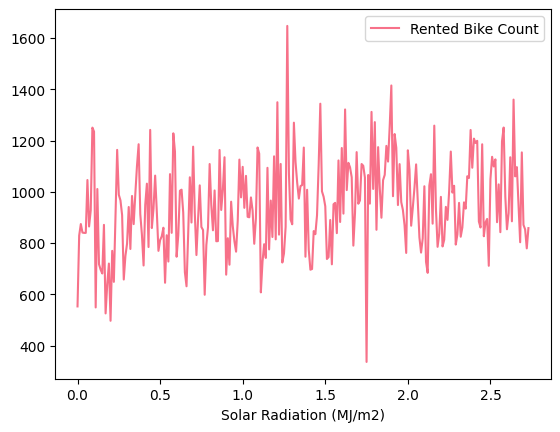

In [127]:
solar_chart=pd.pivot_table(solar, values = "Rented Bike Count", index= "Solar Radiation (MJ/m2)")
solar_chart.plot()

1. **General Trend**: The number of rented bikes fluctuates across different levels of solar radiation. There doesn't seem to be a strong linear relationship between solar radiation and bike rentals, as rentals vary widely for similar levels of solar radiation.

2. **Peaks and Troughs**: There are several peaks where the bike rental count is relatively high and troughs where the count drops significantly. These fluctuations suggest that while solar radiation may have some impact on bike rentals, other factors likely play significant roles.

3. **Variability**: The bike rental count shows high variability for most of the solar radiation values. For example, around 0.5 MJ/m² and 1.5 MJ/m², the rentals can be both high and low.

4. **Outliers**: There is a noticeable drop in bike rentals around 1.5 MJ/m², which could be an outlier or influenced by other conditions not captured by solar radiation alone.



## 3.6 Saved to Excel

In [129]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
744,206,0,-3.2,40,0.5,1358,0.0,0.0,0.0,Winter,Holiday,1,1,2018
745,230,1,-3.3,41,0.7,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
746,178,2,-3.7,42,0.9,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
747,119,3,-4.0,44,1.0,2000,0.0,0.0,0.0,Winter,Holiday,1,1,2018
748,62,4,-4.2,53,1.1,1994,0.0,0.0,0.0,Winter,Holiday,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018


In [131]:
file_path = '/content/drive/MyDrive/Data Analysis Course/Seoul Bike/Final Dataset.xlsx'

# Lưu DataFrame vào tệp Excel
df1.to_excel(file_path, index=False)

#**4. Modeling**

## 4.1 Data Normalization

In [ ]:
num_col=df.select_dtypes(include=np.number).columns.tolist()
num_col

In [ ]:
from math import sqrt
import warnings

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(data,col):
  for i in col:
    arr = data[i]
    arr = np.array(arr)
    data[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return data

In [ ]:
df = normalization(df.copy(),num_col)
df

##4.2 Dummy Variables

In [ ]:
cat_col =['Seasons','Holiday','Functioning Day']
df_cat = df[cat_col].copy()
df_cat

In [ ]:
df_cat = pd.get_dummies(df_cat,columns=cat_col)
df_cat

In [ ]:
# prompt: chuyển true false thành 0 1

df_cat = df_cat.replace({True: 1, False: 0})
df_cat


In [ ]:
df.drop(columns=cat_col,inplace=True)
df.drop(columns=['Date'],inplace=True)
df

## 4.3 Linear Regression Model


In [ ]:
df.info()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X = df.drop(['Rented Bike Count'],axis=1)
Y = df['Rented Bike Count']

In [ ]:
lm = LinearRegression()
lm

In [ ]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':  # Check if column is datetime
        df[col] = df[col].astype('int64') // 10**9  # Convert to Unix timestamp

# Now fit the model
lm.fit(X,Y)

In [ ]:
Yhat=lm.predict(X)
Yhat

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
width=5
height=6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Rented Bike Count'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Rented Bike Count')
plt.xlabel(' (in Bike)')
plt.ylabel('Proportion of Bike')

plt.show()
plt.close()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=5)

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm_acc = lm.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lm_acc)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [ ]:
lm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lm_df

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lm.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

The graph compares the predicted values (in blue) with the actual (real) values (in red) of the bike rentals.

1. **Prediction Accuracy**: The predictions closely follow the actual values, indicating a generally good performance of the predictive model. However, there are certain peaks and troughs where the predictions diverge from the real values.

2. **Trends and Patterns**: The model seems to capture the overall trends and patterns in the bike rental data, including the cyclical nature of the rentals.

3. **Peaks and Troughs**: In several instances, the predictions are able to match the peaks and troughs in the real values, but there are some discrepancies, especially during higher rental counts where the model sometimes underestimates or overestimates the rentals.

4. **Residual Analysis**: The differences between the predicted and actual values (residuals) are apparent in some regions. This could indicate areas where the model could be improved or where additional factors might need to be considered.

# **5. Conclusion**

## 5.1 Insight
### Summary of Bike Rental Trends and Insights:

**Peak and Low Months:**
- **Peak Month:** July has the highest number of rentals.
- **Low Months:** January and February have the lowest rentals, likely due to winter weather conditions.

**Seasonal Rental Trends:**
- **Highest Rental Season:** Summer, with around 1.8 million rentals due to favorable weather and longer daylight hours.
- **Moderate Rental Seasons:** Autumn and Spring have high bike rental counts, with Autumn slightly higher than Spring.
- **Lowest Rental Season:** Winter has the lowest rental counts due to cold weather, shorter days, and harsher biking conditions.
- **Seasonal Trends:** Rentals increase during warmer months (Spring, Summer, Autumn) and decrease sharply in Winter.

**Holiday vs. Non-Holiday Trends:**
- **High Rental Days:** May 1st, June 6th, and October 3rd show significant spikes in bike rentals, indicating popular biking activity on these holidays.
- **Low Rental Days:** January 1st, March 1st, February 16th, and February 17th show lower rentals, likely due to weather conditions or the nature of the holidays.

**Temperature Correlation:**
- **Positive Correlation:** Rentals increase with temperature from -20°C to around 30°C.
- **Optimal Temperature Range:** Peak rentals occur between 20°C and 30°C.
- **Extreme Temperatures:** Rentals decline above 30°C and below 0°C due to discomfort and challenging conditions.

**Time of Day Analysis:**
- **Morning Peak:** Non-holidays show a clear peak around 8 AM for the morning commute. Holidays have a less pronounced morning peak.
- **Afternoon/Evening Activity:** Both holidays and non-holidays show increased rentals from 10 AM to 6 PM, with higher and sustained peaks in the afternoon.
- **Overall Rental Count:** Holidays generally have lower rentals compared to non-holidays, except during midday hours when counts are similar.

**Seasonal Analysis:**
- **Summer:** Highest rental counts throughout the day.
- **Spring and Autumn:** High rentals with similar trends to Summer.
- **Winter:** Lowest rentals with a flatter curve and fewer rentals throughout the day.

**Solar Radiation Impact:**
- **General Trend:** No strong linear relationship between solar radiation and bike rentals; high variability across different levels.
- **Peaks and Troughs:** Significant fluctuations suggest other factors play a significant role in bike rentals.
- **Variability:** High variability in rentals for most solar radiation values.
- **Outliers:** Notable drop in rentals around 1.5 MJ/m², possibly due to other influencing conditions.


## 5.2 Recommendations

**Peak and Low Seasons:**
- **Summer:** Highest rentals; increase bike availability and support staff.
- **Winter:** Lowest rentals; reduce fleet, offer winter gear, and indoor cycling events.

**Holiday vs. Non-Holiday Strategies:**
- **High Rental Holidays (May 1st, June 6th, October 3rd):** Launch themed events and marketing campaigns.
- **Low Rental Holidays (January 1st, February 16th, February 17th):** Offer special promotions to boost rentals.

**Temperature-Based Strategies:**
- **Optimal (20°C to 30°C):** Implement special promotions and highlight pleasant conditions.
- **Cold Weather:** Offer discounts and bundle rentals with cold-weather gear.
- **Hot Weather:** Provide shaded parking, bottled water, cooling accessories, and promote morning/evening rentals.

**Weather Forecast Integration:**
- Use weather forecasts to send notifications and offers for favorable conditions.
- Adjust fleet availability based on weather forecasts and historical data.

**Targeted Promotions:**
- **Low Rental Days:** Offer discounts or special deals to encourage rentals.
- **Morning Promotions:** Encourage morning rentals with discounts, especially on holidays.
- **Evening Promotions:** Maintain rentals after the morning peak with evening deals on non-holidays.

**Seasonal Campaigns:**
- Organize events, tours, and challenges during high rental seasons (Summer, Spring).
- Launch marketing campaigns around holidays with high rentals.

**Commute-Friendly Options:**
- Offer monthly or seasonal subscriptions for regular commuters.
- Promote bike-to-work schemes with local businesses.

**Flexible Rental Hours:**
- Extend rental hours during Summer and Spring.
- Provide early morning rentals during Winter with special deals.

**General Improvements:**
- Ensure bike availability and good condition during peak rental days.
- Use dynamic pricing or promotions based on weather forecasts to boost rentals during low-rental months.
